In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz

### 목표
- 버섯의 특성들을 활용하여 독/식용 분류해보자!
- 결정트리 모델을 시각화 해보자!
- 특성 선택을 해보자!

- 1. 데이터 로드(index는 설정하지 말 것)
- 2.전체 컬럼, 행의 숫자 파악해보기
- 3.결측치가 있는지, 기술통계 확인해보기

In [2]:
mushroom = pd.read_csv("data/mushroom.csv") 
mushroom

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushroom.shape #행, 열 확인

(8124, 23)

In [4]:
mushroom.info() #결측치, 널 값 데이터 없음, 모든 타입은 문자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom.describe() #기술 통계 
                    #문자형 데이터는 수치형 데이터와 다른 통계치가 나옴
                    #top : 해당 컬럼(특성)에서 가장 많은 수를 차지하는 문자
                    #freq : top의 빈도수

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 데이터 전처리
- 전처리 필요 없음

### 탐색적 분석(EDA)

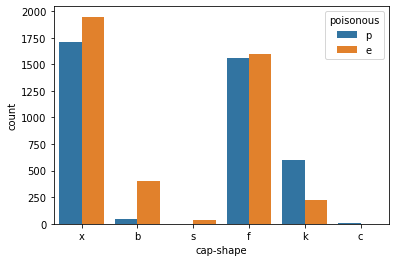

In [6]:
sns.countplot(data = mushroom,
              x = "cap-shape", # x 축 설정
              # hue : 해당 컬럼의 unique 값들이 들어가서 출력
              # unique 값에 대한 각각의 bar차트와 범례가 표시됨
              hue = "poisonous" 
             ); #밑에 깔끔하게 출력

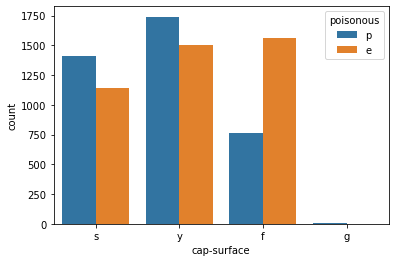

In [7]:
sns.countplot(data = mushroom,
              x = "cap-surface", # x 축 설정
              # hue : 해당 컬럼의 unique 값들이 들어가서 출력
              # unique 값에 대한 각각의 bar차트와 범례가 표시됨
              hue = "poisonous" 
             ); #밑에 깔끔하게 출력

### 모델링
- 문제(x)와 정답(y)로 분리

In [8]:
mushroom

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [9]:
y = mushroom["poisonous"]
X = mushroom.loc[:, "cap-shape":"habitat"]

In [10]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [11]:
y
X
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

### 레이블 인코딩
- 숫자의 크고 작음에 대한 특성이 작용함
- 회귀와 같이 연속된 실수를 다루는 알고리즘에서는 1,2,3..~커지는 숫자가 숫자에 따른 순서나 중요도로 인식될 수 있어서 잘못된 결과가 나올 수 있음
- 문자형 데이터를 숫자형 데이터로 인코딩 해줘야 학습이 됨

In [12]:
X["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [13]:
# cap-shape의 유니크값들의 개수를 확인해보기
X["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [14]:
# 인코딩 전
X["cap-shape"]

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [15]:
# 인코딩 후
X["cap-shape"].map({"x" : 0, "f" : 1, "k" : 2, "b" : 3, "s" : 4, "c" : 5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [16]:
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

# 레이블 인코더로 학습(cap-shape의 unique 값들로 학습이 됨)
encoder.fit(X["cap-shape"])

# 문자 데이터로 학습된 인코더의 unique 값들을 숫자로 변환
labels = encoder.transform(X["cap-shape"])

print(labels)

[5 5 0 ... 2 3 5]


### one-hot 인코딩
- 모든 데이터를 0 과 1로 변환
- 기계는 모든 데이터를 2진법으로 처리하기 때문에 레이블 방식보다는 원 핫 인코딩을 주로 사용

In [18]:
# 데이터 프레임 전체 컬럼 보기
#pd.set_option("display.max_columns", None)
# None : 무제한으로 있는 컬럼의 수 만큼 다 보여줌(수치로 최대치를 설정해줄 수 있음)

In [19]:
#데이터프레임 전체 행 보기
#pd.set_option("display.max_rows", None)

In [29]:
# 데이터프레임 옵션 설정 초기화
#pd.reset_option("display")

In [21]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [22]:
X_one_hot = pd.get_dummies(X)

In [35]:
X = X_one_hot

### 모델링
- 학습 및 정답 데이터 나누기!

In [36]:
# 학습 데이터와 정답 데이터 나누기(원핫인코딩 한 결과를 사용할 것)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 32
                                                   )

In [37]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(2438, 117)
(2438,)
(5686, 117)
(5686,)


In [40]:
#결정트리 모델 불러오기
# 트리모델은 하이퍼파라미터를 조정해주지 않으면 완전히 분류될때까지 계속해서 분기 해 나감
tree_model = DecisionTreeClassifier()

#모델 학습
tree_model.fit(X_train, y_train)

#모델 평가
tree_model.score(X_test, y_test)

1.0

### 트리 모델 내부 시각화하기
- 외부 라이브러리인 graphviz를 설치(트리 모델의 내부를 시각화 하기 위한 라이브러리)

In [41]:
!pip install graphviz

In [48]:
# dot 파일을 만들기
# dot파일 : 그래프를 출력하기 위해 저장해주는 텍스트 형식의 파일
# out_file : 파일명 및 저장 경로 설정
export_graphviz(tree_model, out_file="data/tree.dot",
                 # 클래스(label) 이름 설정
                class_names=["독", "식용"],
                # 원핫 인코딩 된 데이터프레임의 컬럼명을 가져와서 특성 이름으로 활용
                feature_names=X_one_hot.columns,
                # 지니불순도 출력 여부 결정(False는 미출력)
                impurity=True,
                # True 라면 노드의 클래스가 구분되도록 색상을 칠해줌
                filled=True
               )


In [49]:
# graphviz가 임포트가 되지 않을 경우 수동으로 경로 설정하기!
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

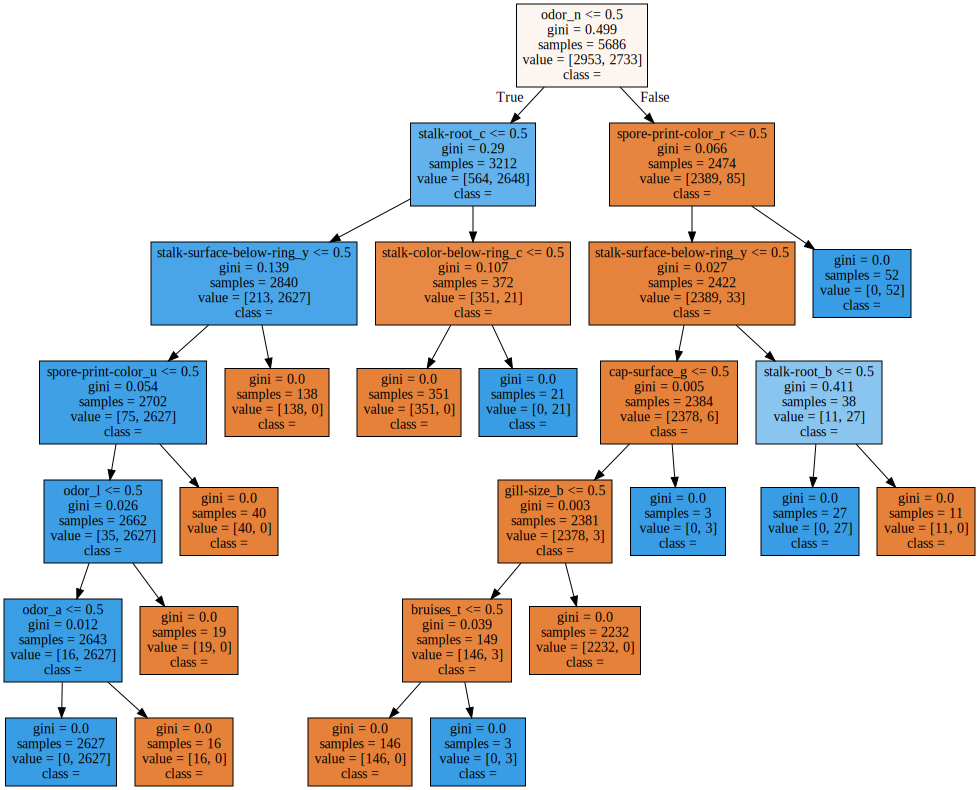

In [50]:
#위에서 만든 tree.dot 파일을 불러와서 시각화 표로 만들기!
import graphviz
# tree.dot 파일을 불러오면서 UTF8(한글인코딩)로 변환 시켜주고 이를 f로 지칭함
with open("data/tree.dot", encoding="UTF8") as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))
# gini : 지니불순도
# samples : 샘플(데이터)의 개수
# value : 클래스 별 개수["독"의 개수, "식용"의 개수]
# class : 예측한 정답 값

### 하이퍼파라미터 조정

In [78]:
tree_md = DecisionTreeClassifier(max_depth=2,
                                 max_leaf_nodes=3,
                                 min_samples_leaf=400
                                )

In [79]:
tree_md.fit(X_train, y_train)
tree_md.score(X_test, y_test)

0.9155045118949959

In [80]:
export_graphviz(tree_md, out_file="data/tree2.dot",                
                class_names=["독", "식용"],                
                feature_names=X_one_hot.columns,                
                impurity=True,               
                filled=True
               )

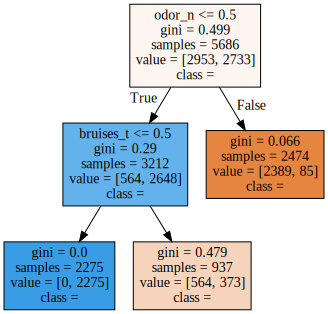

In [82]:
import graphviz
# tree.dot 파일을 불러오면서 UTF8(한글인코딩)로 변환 시켜주고 이를 f로 지칭함
with open("data/tree2.dot", encoding="UTF8") as f :
    dot_graph2 = f.read()
    
display(graphviz.Source(dot_graph2))

In [84]:
train_list = []
test_list = []

for k in range(1,11,1) :
    # 모델 생성 및 하이퍼파라미터에 변수 넣기
    tree_md = DecisionTreeClassifier(max_depth=k)
    # 모델 학습
    tree_md.fit(X_train, y_train)
    
    # 학습한 모델의 정확도를 측정 -> 측정한 값을 빈 리스트에 담아주기!
    # 학습 데이터
    train_score = tree_md.score(X_train, y_train)
    train_list.append(train_score)
    
    # 평가 데이터
    test_score = tree_md.score(X_test, y_test)
    test_list.append(test_score)

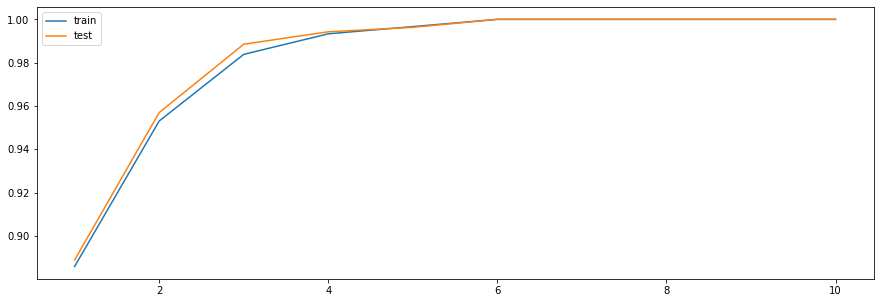

In [87]:
# 그래프로 표현해보자잇~!
plt.figure(figsize=(15, 5))
plt.plot(range(1,11,1), train_list, label = "train")
plt.plot(range(1,11,1), test_list, label = "test")
# loc : 범레의 위치를 표시(upper, center, lower), (left, center, right)
# prop : 범례의 크기를 설정
plt.legend(loc = "upper left", prop = {"size" : 10})
plt.show()

### 특성 선택(feature selection)
- 지도학습 모델의 특성중요도(각 특성들은 0~1사이의 중요도 값을 가짐, 모든 중요도의 합은 1이 됨)
- 0이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 도움이 되지 않는 특성
- 1은 완벽하게 정답을 예측해 내는 특성(1이 나오는 특성이 있으면 예측에 있어서 다른 특성들은 필요가 없음)

In [90]:
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10563497e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.07105494e-03, 1.12043501e-02, 0.00000000e+00,
       0.00000000e+00, 1.31302293e-02, 0.00000000e+00, 6.14585875e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.98928269e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.50651250e-03, 1.74814542e-01, 0.00000000e+00, 0.00000000e+00,
      

In [95]:
#pd.set_option("display.max_rows", None)
#pd.reset_option("display")

In [99]:
# 특성중요도를 데이터프레임화 시키기
fi_df = pd.DataFrame(fi, index = X_one_hot.columns)
fi_df = fi_df.sort_values(by=0, ascending = False)
# by : 기준이 되는 열을 설정
# ascending = False : 내림차순
fi_df

,0
odor_n,0.614586
stalk-root_c,0.174815
stalk-surface-below-ring_y,0.100648
spore-print-color_r,0.034895
spore-print-color_u,0.027039
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


In [100]:
# 불리언 인덱싱
fi_df[fi_df.values >= 0.01]

,0
odor_n,0.614586
stalk-root_c,0.174815
stalk-surface-below-ring_y,0.100648
spore-print-color_r,0.034895
spore-print-color_u,0.027039
stalk-color-below-ring_c,0.013960
odor_l,0.013130
odor_a,0.011204


- tree 모델 내부 시각화 표를 보면 가장 중요도가 높은 컬럼인 odor_n을 먼저 고려해서 분류한 것을 알 수 있다.
- 중요도 수치가 가장 높은(정답을 분류하는데 가장 중요한) 특성을 먼저 고려해야 가장 효율적으로 분류할 수 있다.
- 현재 mushroom 데이터는 odor_n 컬럼이 0.6 이상의 중요도 수치를 혼자 차지하고 있기 때문에 비교적 학습이 용이하여 100%의 정확를 얻어낼 수 있다.